In [2]:
df=pd.read_csv(r"C:\Users\naman\Downloads\Mlp.csv")

In [3]:
df.head()

,Images,"Tr(x, y)",PM level
0,1.jpg,0.318673,142
1,10.jpg,0.395676,84
2,100.jpg,0.751089,34
3,101.jpg,0.300980,214
4,102.jpg,0.915216,17


In [4]:
df.iloc[:,1]

0      0.318673
1      0.395676
2      0.751089
3      0.300980
4      0.915216
         ...   
322    0.999873
323    0.969228
324    0.945422
325    0.749951
326    0.425354
Name: Tr(x, y), Length: 327, dtype: float64

In [5]:
x=df['Tr(x, y)']
y=df['PM level']

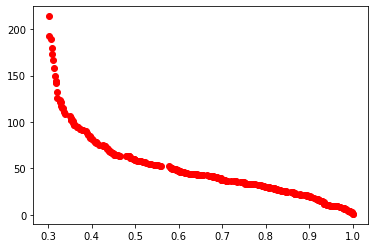

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x,y,c='red')

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
x_train.shape
np.expand_dims(x_train,axis=0)

array([[0.35349286, 0.95556667, 0.79585166, 0.40394735, 0.44245682,
        0.44735855, 0.83484642, 0.86263786, 0.65289195, 0.64596513,
        0.80645228, 0.31867343, 0.94807881, 0.95273936, 0.6961153 ,
        0.30958005, 0.59732015, 0.8681028 , 0.72090546, 0.94038444,
        0.64141491, 0.86232506, 0.66574112, 0.30097979, 0.83239173,
        0.39580946, 0.82237625, 0.82527955, 0.88973196, 0.74200214,
        0.83621979, 0.94092364, 0.79176135, 0.40813391, 0.31201554,
        0.31833954, 0.35088385, 0.44237688, 0.89495662, 0.97700738,
        0.97867269, 0.99408799, 0.69911222, 0.4878037 , 0.58078677,
        0.78523709, 0.44031544, 0.32839174, 0.84681377, 0.69650311,
        0.60052906, 0.9027044 , 0.78821127, 0.48057836, 0.30851131,
        0.53304945, 0.80110114, 0.81939415, 0.74953135, 0.63155778,
        0.38832866, 0.45338756, 0.39221354, 0.35892846, 0.40925086,
        0.58148463, 0.5453141 , 0.86703008, 0.69633733, 0.32923372,
        0.59599947, 0.33803753, 0.31241944, 0.78

In [38]:
x_train=np.array(x_train)
x_test=np.array(x_test)
x_train.shape

(261,)

In [39]:
x_train=x_train.reshape(261,1,1,1)

In [40]:
x_train.shape

(261, 1, 1, 1)

In [41]:
x_test=x_test.reshape(66,1,1,1)

In [42]:
x_test.shape

(66, 1, 1, 1)

In [12]:
from tensorflow.keras.layers import Dense,Input,Flatten,Conv2D
from tensorflow.keras.models import Sequential

In [13]:
model=Sequential()
#model.add(Conv2D(1,2,activation='relu'))
model.add(Input(shape=(1,1,1)))
model.add(Conv2D(3,1,activation='relu'))
model.add(Conv2D(9,1,activation='relu'))
model.add(Conv2D(27,1,activation='relu'))
# model.add(Conv2D(81,1,activation='relu'))
model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dense(64,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
# model.add(Dense(256,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 3)           6         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 9)           36        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 27)          270       
_________________________________________________________________
flatten (Flatten)            (None, 27)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2

In [70]:
hist=model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Epoch 1/500
9/9 [==============================] - 1s 23ms/step - loss: 3770.0701 - mae: 48.8106 - val_loss: 2787.6340 - val_mae: 45.9670
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 3625.0161 - mae: 47.0601 - val_loss: 2514.8694 - val_mae: 42.6659
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 3202.7703 - mae: 42.2228 - val_loss: 1847.2343 - val_mae: 34.0100
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 2388.5762 - mae: 34.0083 - val_loss: 1047.7428 - val_mae: 24.8507
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 2026.2637 - mae: 34.1816 - val_loss: 1130.7354 - val_mae: 28.8067
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 1949.8911 - mae: 32.9410 - val_loss: 988.0576 - val_mae: 24.2108
Epoch 7/500
9/9 [==============================] - 0s 7ms/step - loss: 1843.1088 - mae: 30.3880 - val_loss: 956.0704 - val_mae: 24.0865
Epoch 8/500
9/9 [=========================

Epoch 62/500
9/9 [==============================] - 0s 5ms/step - loss: 74.7988 - mae: 4.2413 - val_loss: 14.5912 - val_mae: 2.8105
Epoch 63/500
9/9 [==============================] - 0s 5ms/step - loss: 72.0634 - mae: 3.8364 - val_loss: 26.8100 - val_mae: 3.5912
Epoch 64/500
9/9 [==============================] - 0s 5ms/step - loss: 69.7015 - mae: 4.1602 - val_loss: 26.4541 - val_mae: 3.4300
Epoch 65/500
9/9 [==============================] - 0s 5ms/step - loss: 82.5436 - mae: 5.1811 - val_loss: 26.7757 - val_mae: 4.3187
Epoch 66/500
9/9 [==============================] - 0s 5ms/step - loss: 80.2979 - mae: 5.1231 - val_loss: 18.2238 - val_mae: 3.0350
Epoch 67/500
9/9 [==============================] - 0s 5ms/step - loss: 72.6201 - mae: 4.5488 - val_loss: 24.2026 - val_mae: 4.0001
Epoch 68/500
9/9 [==============================] - 0s 5ms/step - loss: 83.1524 - mae: 5.2173 - val_loss: 102.6584 - val_mae: 9.3195
Epoch 69/500
9/9 [==============================] - 0s 6ms/step - loss: 102

Epoch 124/500
9/9 [==============================] - 0s 4ms/step - loss: 32.2098 - mae: 2.7461 - val_loss: 10.9056 - val_mae: 1.9823
Epoch 125/500
9/9 [==============================] - 0s 4ms/step - loss: 35.0923 - mae: 3.0456 - val_loss: 12.9013 - val_mae: 2.9227
Epoch 126/500
9/9 [==============================] - 0s 4ms/step - loss: 45.3242 - mae: 3.7143 - val_loss: 25.4414 - val_mae: 3.6315
Epoch 127/500
9/9 [==============================] - 0s 4ms/step - loss: 35.8559 - mae: 3.6234 - val_loss: 12.2371 - val_mae: 2.2772
Epoch 128/500
9/9 [==============================] - 0s 4ms/step - loss: 38.8018 - mae: 3.2751 - val_loss: 7.3329 - val_mae: 2.0944
Epoch 129/500
9/9 [==============================] - 0s 5ms/step - loss: 33.1730 - mae: 2.9647 - val_loss: 11.5547 - val_mae: 2.2142
Epoch 130/500
9/9 [==============================] - 0s 4ms/step - loss: 32.6570 - mae: 3.0434 - val_loss: 21.1618 - val_mae: 3.2497
Epoch 131/500
9/9 [==============================] - 0s 4ms/step - los

9/9 [==============================] - 0s 5ms/step - loss: 13.1699 - mae: 1.9796 - val_loss: 3.5556 - val_mae: 1.3326
Epoch 248/500
9/9 [==============================] - 0s 6ms/step - loss: 13.6285 - mae: 1.9597 - val_loss: 2.1733 - val_mae: 1.1958
Epoch 249/500
9/9 [==============================] - 0s 6ms/step - loss: 40.0238 - mae: 3.2965 - val_loss: 6.8346 - val_mae: 1.8029
Epoch 250/500
9/9 [==============================] - 0s 5ms/step - loss: 35.2936 - mae: 3.8849 - val_loss: 20.0569 - val_mae: 4.1199
Epoch 251/500
9/9 [==============================] - 0s 5ms/step - loss: 22.2204 - mae: 2.8110 - val_loss: 13.3546 - val_mae: 2.0307
Epoch 252/500
9/9 [==============================] - 0s 4ms/step - loss: 21.2316 - mae: 2.4000 - val_loss: 15.1763 - val_mae: 3.0124
Epoch 253/500
9/9 [==============================] - 0s 5ms/step - loss: 57.7306 - mae: 4.9895 - val_loss: 51.4805 - val_mae: 6.5497
Epoch 254/500
9/9 [==============================] - 0s 5ms/step - loss: 48.9700 - mae

9/9 [==============================] - 0s 5ms/step - loss: 8.5645 - mae: 1.4037 - val_loss: 3.2883 - val_mae: 1.4209
Epoch 310/500
9/9 [==============================] - 0s 5ms/step - loss: 9.5401 - mae: 1.7750 - val_loss: 1.7275 - val_mae: 1.0531
Epoch 311/500
9/9 [==============================] - 0s 5ms/step - loss: 9.0669 - mae: 1.6415 - val_loss: 1.8616 - val_mae: 1.0468
Epoch 312/500
9/9 [==============================] - 0s 4ms/step - loss: 9.7344 - mae: 1.6915 - val_loss: 1.4666 - val_mae: 0.9687
Epoch 313/500
9/9 [==============================] - 0s 5ms/step - loss: 7.7503 - mae: 1.3782 - val_loss: 1.7666 - val_mae: 1.0181
Epoch 314/500
9/9 [==============================] - 0s 4ms/step - loss: 7.6322 - mae: 1.4759 - val_loss: 3.2986 - val_mae: 1.4716
Epoch 315/500
9/9 [==============================] - 0s 4ms/step - loss: 10.5240 - mae: 1.7861 - val_loss: 1.2812 - val_mae: 0.9269
Epoch 316/500
9/9 [==============================] - 0s 4ms/step - loss: 7.2244 - mae: 1.3722 - 

9/9 [==============================] - 0s 5ms/step - loss: 4.9378 - mae: 1.3338 - val_loss: 5.0544 - val_mae: 1.9092
Epoch 434/500
9/9 [==============================] - 0s 5ms/step - loss: 13.0952 - mae: 2.3538 - val_loss: 1.1697 - val_mae: 0.8227
Epoch 435/500
9/9 [==============================] - 0s 5ms/step - loss: 6.6148 - mae: 1.9296 - val_loss: 2.7001 - val_mae: 1.4427
Epoch 436/500
9/9 [==============================] - 0s 5ms/step - loss: 6.0569 - mae: 1.5619 - val_loss: 1.5598 - val_mae: 0.9173
Epoch 437/500
9/9 [==============================] - 0s 6ms/step - loss: 19.5854 - mae: 2.2979 - val_loss: 18.6625 - val_mae: 4.0335
Epoch 438/500
9/9 [==============================] - 0s 4ms/step - loss: 21.6051 - mae: 3.5920 - val_loss: 4.9813 - val_mae: 2.0620
Epoch 439/500
9/9 [==============================] - 0s 4ms/step - loss: 12.1475 - mae: 1.9353 - val_loss: 9.0219 - val_mae: 1.8377
Epoch 440/500
9/9 [==============================] - 0s 4ms/step - loss: 13.8474 - mae: 2.23

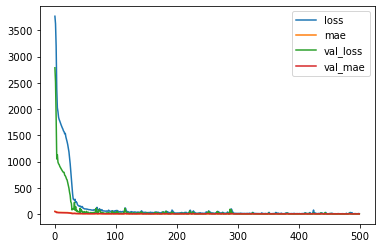

In [71]:
df1=pd.DataFrame(hist.history).plot()

In [72]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.4794 - mae: 1.0151


[1.479362964630127, 1.015059232711792]

In [73]:
y_pred=model.predict(x_test)

In [76]:
y_pred[:20]

array([[25.909407 ],
       [39.006172 ],
       [60.501328 ],
       [39.016815 ],
       [36.506226 ],
       [27.581919 ],
       [34.69278  ],
       [15.581714 ],
       [14.972657 ],
       [48.14866  ],
       [24.996841 ],
       [72.21094  ],
       [ 9.486711 ],
       [41.20505  ],
       [ 4.3829794],
       [29.749731 ],
       [44.98784  ],
       [24.044806 ],
       [48.59057  ],
       [27.634573 ]], dtype=float32)

In [77]:
y_test[:20]

271    25
191    38
277    60
119    38
133    36
77     27
66     34
321    15
13     15
30     47
70     25
141    74
273     9
107    41
25      3
252    30
206    44
165    22
264    47
38     27
Name: PM level, dtype: int64

In [83]:
model.save('sem-5.h5')

In [83]:
y_pre=lr.predict(x_test)

<AxesSubplot:xlabel='Tr(x, y)', ylabel='PM level'>

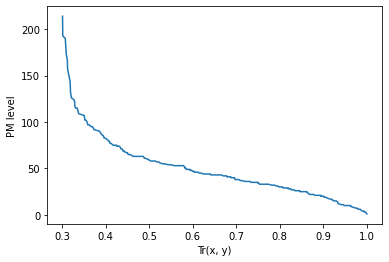

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='Tr(x, y)',y='PM level',data=df)

In [1]:
from keras.models import load_model

In [2]:
model=load_model('sem-5.h5')

In [8]:
from PIL import Image
import numpy as np
import os
photo=Image.open(r"C:\Users\naman\Downloads\WhatsApp Image 2021-11-23 at 9.30.15 PM.jpeg")
width,height=photo.size
pix_val=list(photo.getdata())
pix_val=np.array(pix_val).reshape((width,height,3))
photo=photo.convert('RGB')
width=photo.size[0]
height=photo.size[1]
R1=[]
G1=[]
B1=[]
for y in range(0,height):
    row=""
    for x in range(0,width):
        RGB=photo.getpixel((x,y))
        R,G,B=RGB
        R1.append(R)
        G1.append(G)
        B1.append(B)
R1=np.array(R1).reshape((width,height))
G1=np.array(G1).reshape((width,height))
B1=np.array(B1).reshape((width,height))
x=np.minimum(G1,B1)
x=np.minimum(x,R1)
t=1-(x/np.max(x))/1
avg=np.mean(t)
tr=avg
print(tr)
tr=np.array(tr).reshape(1,1,1,1)

0.4098621388888887


In [10]:
pred=model.predict(tr)
print(pred)
pred1=pred+140
print(pred1[0])

[[78.41061]]
[218.41061]
